In [1]:
import sys
sys.path.append('../')
from src.load_data import *
from src.realtime_utils import *
from src.hp_tuning_functions import *
from src.plot_functions import *

In [2]:
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import MinimalFCParameters

In [3]:
from tsfresh.utilities.dataframe_functions import roll_time_series

In [19]:
from tsfresh.feature_extraction import ComprehensiveFCParameters

In [20]:
ComprehensiveFCParameters()

{'variance_larger_than_standard_deviation': None, 'has_duplicate_max': None, 'has_duplicate_min': None, 'has_duplicate': None, 'sum_values': None, 'abs_energy': None, 'mean_abs_change': None, 'mean_change': None, 'mean_second_derivative_central': None, 'median': None, 'mean': None, 'length': None, 'standard_deviation': None, 'variation_coefficient': None, 'variance': None, 'skewness': None, 'kurtosis': None, 'root_mean_square': None, 'absolute_sum_of_changes': None, 'longest_strike_below_mean': None, 'longest_strike_above_mean': None, 'count_above_mean': None, 'count_below_mean': None, 'last_location_of_maximum': None, 'first_location_of_maximum': None, 'last_location_of_minimum': None, 'first_location_of_minimum': None, 'percentage_of_reoccurring_values_to_all_values': None, 'percentage_of_reoccurring_datapoints_to_all_datapoints': None, 'sum_of_reoccurring_values': None, 'sum_of_reoccurring_data_points': None, 'ratio_value_number_to_time_series_length': None, 'sample_entropy': None, 

In [21]:
time_series_features = {
    'abs_energy': None,
    'absolute_maximum': None,
    'absolute_sum_of_changes': None,
    'autocorrelation': [{'lag': i} for i in range(1, 9)],
    'count_above_mean': None,
    'count_below_mean': None,
    'first_location_of_maximum': None,
    'first_location_of_minimum': None,
    'kurtosis': None,
    'last_location_of_maximum': None,
    'last_location_of_minimum': None,
    'linear_trend': [{'attr': 'pvalue'}, {'attr': 'rvalue'}, {'attr': 'intercept'}, {'attr': 'slope'}],
    'maximum': None,
    'mean': None,
    'mean_abs_change': None,
    'mean_change': None,
    'mean_second_derivative_central': None,
    'median': None,
    'minimum': None,
    'number_peaks': [{'n': 1}, {'n': 2}, {'n': 3}],
    'partial_autocorrelation': [{'lag': i} for i in range(1, 9)],
    'root_mean_square': None,
    'skewness': None,
    'standard_deviation': None
}

# Load data

In [4]:
targets, covariates = load_realtime_training_data()

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.


In [5]:
# targets_train, targets_validation = train_validation_split(targets, 2023)

<Axes: xlabel='date'>

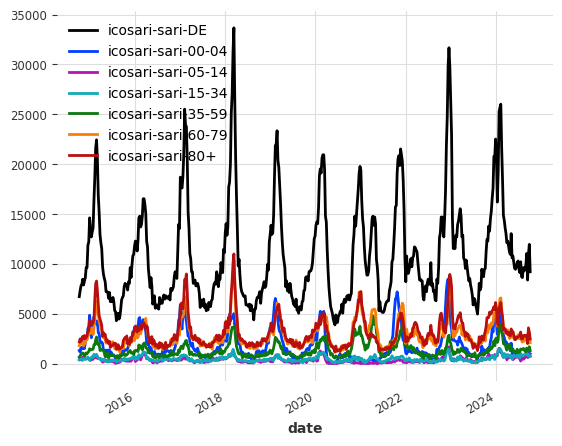

In [6]:
targets.plot()

In [7]:
# targets_validation['icosari-sari-DE'].plot(label='validation')
# targets_train['icosari-sari-DE'].plot(label='train')

In [13]:
df_melted = targets.pd_dataframe().reset_index().melt(id_vars='date')

In [14]:
df_rolled = roll_time_series(df_melted, column_id="component", column_sort='date', min_timeshift=8, max_timeshift=8)

Rolling: 100%|██████████| 105/105 [00:00<00:00, 236.58it/s]


In [15]:
df_rolled = df_rolled.drop(columns='component')

In [22]:
df_features = extract_features(df_rolled, default_fc_parameters=time_series_features, column_id='id', column_sort='date')

Feature Extraction: 100%|██████████| 117/117 [00:02<00:00, 42.29it/s]


In [23]:
df_features

value__abs_energy  value__absolute_maximum  \
icosari-sari-00-04 2014-11-30         27050592.0                   2471.0   
                   2014-12-07         31757492.0                   2550.0   
                   2014-12-14         42809353.0                   3531.0   
                   2014-12-21         54254824.0                   3736.0   
                   2014-12-28         75159065.0                   4871.0   
...                                          ...                      ...   
icosari-sari-DE    2024-09-08        830374613.0                  11057.0   
                   2024-09-15        817236404.0                  11057.0   
                   2024-09-22        833094004.0                  11057.0   
                   2024-09-29        900203404.0                  11971.0   
                   2024-10-06        910606072.0                  11971.0   

                               value__absolute_sum_of_changes  \
icosari-sari-00-04 2014-11-30                          2261.0   
                   2014-12-07                          2190.0   
                   2014-12-14                          2776.0   
                   2014-12-21                          2886.0   
                   2014-12-28                          3851.0   
...                                                       ...   
icosari-sari-DE    2024-09-08                          5738.0   
                   2024-09-15                          7318.0   
                   2024-09-22                          8399.0   
                   2024-09-29                          9313.0   
                   2024-10-06                         11058.0   

                               value__autocorrelation__lag_1  \
icosari-sari-00-04 2014-11-30                       0.432490   
                   2014-12-07                       0.553599   
                   2014-12-14                       0.507528   
                   2014-12-21                       0.714099   
                   2014-12-28                       0.637849   
...                                                      ...   
icosari-sari-DE    2024-09-08                       0.085731   
                   2024-09-15                      -0.225636   
                   2024-09-22                      -0.342312   
                   2024-09-29                      -0.045299   
                   2024-10-06                      -0.269925   

                               value__autocorrelation__lag_2  \
icosari-sari-00-04 2014-11-30                       0.003760   
                   2014-12-07                       0.222956   
                   2014-12-14                       0.387684   
                   2014-12-21                       0.332354   
                   2014-12-28                       0.451432   
...                                                      ...   
icosari-sari-DE    2024-09-08                      -0.043264   
                   2024-09-15                      -0.220200   
                   2024-09-22                       0.312153   
                   2024-09-29                      -0.159198   
                   2024-10-06                      -0.381670   

                               value__autocorrelation__lag_3  \
icosari-sari-00-04 2014-11-30                       0.082380   
                   2014-12-07                      -0.080966   
                   2014-12-14                       0.025398   
                   2014-12-21                       0.105817   
                   2014-12-28                       0.000335   
...                                                      ...   
icosari-sari-DE    2024-09-08                       0.104227   
                   2024-09-15                      -0.027562   
                   2024-09-22                       0.067897   
                   2024-09-29                       0.351805   
                   2024-10-06                       0.488934   

                  

In [24]:
# drop columns that contain only one value
unique_cols = df_features.nunique()[df_features.nunique() == 1].index.tolist()
df_features = df_features.drop(columns=unique_cols)

In [25]:
df_features.shape

(3605, 43)

In [26]:
df_features = df_features.dropna(axis=1)

In [27]:
df_features.shape

(3605, 38)

In [18]:
# impute(df_features)

In [32]:
feature_list = []
for horizon in [1, 2, 3, 4]:
    y = df_melted.groupby("component").apply(lambda x: x.set_index("date")["value"].shift(-horizon), include_groups=False).T.unstack()
    y = y[y.index.isin(df_features.index)]
    y = y.dropna()
    df_features_temp = df_features[df_features.index.isin(y.index)]
    features_filtered = select_features(df_features_temp, y)
    feature_list += list(features_filtered.columns)
feature_list = list(set(feature_list))

In [33]:
len(feature_list)

35

In [34]:
features_filtered = df_features[feature_list]

In [35]:
features_filtered

value__absolute_sum_of_changes  \
icosari-sari-00-04 2014-11-30                          2261.0   
                   2014-12-07                          2190.0   
                   2014-12-14                          2776.0   
                   2014-12-21                          2886.0   
                   2014-12-28                          3851.0   
...                                                       ...   
icosari-sari-DE    2024-09-08                          5738.0   
                   2024-09-15                          7318.0   
                   2024-09-22                          8399.0   
                   2024-09-29                          9313.0   
                   2024-10-06                         11058.0   

                               value__root_mean_square  \
icosari-sari-00-04 2014-11-30              1733.672787   
                   2014-12-07              1878.459534   
                   2014-12-14              2180.961893   
                   2014-12-21              2455.262466   
                   2014-12-28              2889.810932   
...                                                ...   
icosari-sari-DE    2024-09-08              9605.407117   
                   2024-09-15              9529.115640   
                   2024-09-22              9621.122619   
                   2024-09-29             10001.129958   
                   2024-10-06             10058.750044   

                               value__mean_abs_change  \
icosari-sari-00-04 2014-11-30                 282.625   
                   2014-12-07                 273.750   
                   2014-12-14                 347.000   
                   2014-12-21                 360.750   
                   2014-12-28                 481.375   
...                                               ...   
icosari-sari-DE    2024-09-08                 717.250   
                   2024-09-15                 914.750   
                   2024-09-22                1049.875   
                   2024-09-29                1164.125   
                   2024-10-06                1382.250   

                               value__autocorrelation__lag_4   value__mean  \
icosari-sari-00-04 2014-11-30                      -0.152172   1692.444444   
                   2014-12-07                      -0.192980   1826.888889   
                   2014-12-14                      -0.457211   2087.000000   
                   2014-12-21                      -0.431891   2326.000000   
                   2014-12-28                      -0.280175   2680.555556   
...                                                      ...           ...   
icosari-sari-DE    2024-09-08                      -0.150945   9579.000000   
                   2024-09-15                      -0.027466   9495.777778   
                   2024-09-22                       0.027080   9578.888889   
                   2024-09-29                       0.034438   9939.111111   
                   2024-10-06                      -0.132498  10003.777778   

                               value__partial_autocorrelation__lag_1  \
icosari-sari-00-04 2014-11-30                               0.432490   
                   2014-12-07                               0.553599   
                   2014-12-14                               0.507528   
                   2014-12-21                               0.714099   
                   2014-12-28                               0.637849   
...                                                              ...   
icosari-sari-DE    2024-09-08                               0.085731   
                   2024-09-15                              -0.225636   
                   2024-09-22                              -0.342312   
                   2024-09-29                              -0.045299   
                   2024-10-06                              -0.269925   

                               value__number_peaks__n_1  \
icosari

In [23]:
features_filtered = features_filtered.reset_index(names=['component', 'date'])

In [24]:
features_filtered.to_csv('../data/features/features_icosari_8w.csv', index=False)

In [45]:
df_features = df_features.reset_index(names=['component', 'date'])

In [46]:
df_features.to_csv('../data/features/features_icosari_8w.csv', index=False)

In [47]:
def combine_component_and_feature_names(ts):
    return ts.with_columns_renamed(ts.columns, ts.static_covariates.component.unique() + '__' + ts.columns)

In [48]:
def load_features(lag=8):
    df_features = pd.read_csv(f'../data/features/features_icosari_{lag}w.csv')
    ts_features = TimeSeries.from_group_dataframe(df_features, group_cols=['component'], 
                                                  time_col='date', freq='7D', fillna_value=0)
    ts_features = [combine_component_and_feature_names(ts_age) for ts_age in ts_features]
    ts_features = [ts_age.with_static_covariates(None) for ts_age in ts_features]
    return concatenate(ts_features, axis='component')

In [49]:
ts_features = load_features()

In [50]:
len(ts_features)

515

In [52]:
ts_features

<TimeSeries (DataArray) (date: 515, component: 266, sample: 1)>
array([[[2.70505920e+07],
        [2.47100000e+03],
        [2.26100000e+03],
        ...,
        [8.12948012e+03],
        [2.76572755e-01],
        [7.80884889e+02]],

       [[3.17574920e+07],
        [2.55000000e+03],
        [2.19000000e+03],
        ...,
        [8.44890527e+03],
        [6.15831210e-01],
        [7.53681155e+02]],

       [[4.28093530e+07],
        [3.53100000e+03],
        [2.77600000e+03],
        ...,
...
        ...,
        [9.62112262e+03],
        [5.30465963e-01],
        [9.00493253e+02]],

       [[6.96141200e+06],
        [1.11900000e+03],
        [9.30000000e+02],
        ...,
        [1.00011300e+04],
        [4.63177539e-01],
        [1.11205700e+03]],

       [[7.65470700e+06],
        [1.11900000e+03],
        [9.18000000e+02],
        ...,
        [1.00587500e+04],
        [5.35381822e-01],
        [1.05018218e+03]]])
Coordinates:
  * date       (date) datetime64[ns] 2014-11-30 2014-12-07 ... 2024-10-06
  * component  (component) object 'icosari-sari-00-04__value__abs_energy' ......
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

<Axes: xlabel='date'>

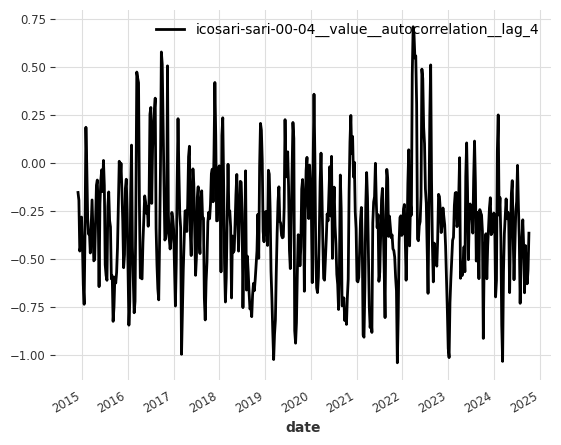

In [53]:
ts_features['icosari-sari-00-04__value__autocorrelation__lag_4'].plot()

Number of components is larger than 10 (266). Plotting only the first 10 components.You can overwrite this in the using the `plot_all_components` argument in plot()Beware that plotting a large number of components may cause performance issues.


<Axes: xlabel='date'>

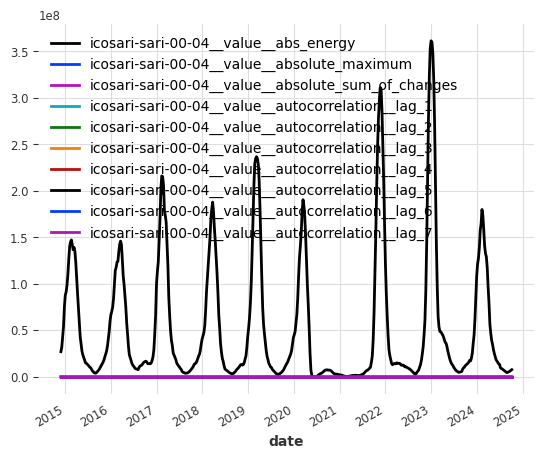

In [54]:
ts_features.plot()

In [33]:
TARGETS

['icosari-sari-DE',
 'icosari-sari-00-04',
 'icosari-sari-05-14',
 'icosari-sari-15-34',
 'icosari-sari-35-59',
 'icosari-sari-60-79',
 'icosari-sari-80+']

In [58]:
[col for col in ts_features.columns if TARGETS[0] in col]

['icosari-sari-DE__value__abs_energy',
 'icosari-sari-DE__value__absolute_maximum',
 'icosari-sari-DE__value__absolute_sum_of_changes',
 'icosari-sari-DE__value__autocorrelation__lag_1',
 'icosari-sari-DE__value__autocorrelation__lag_2',
 'icosari-sari-DE__value__autocorrelation__lag_3',
 'icosari-sari-DE__value__autocorrelation__lag_4',
 'icosari-sari-DE__value__autocorrelation__lag_5',
 'icosari-sari-DE__value__autocorrelation__lag_6',
 'icosari-sari-DE__value__autocorrelation__lag_7',
 'icosari-sari-DE__value__autocorrelation__lag_8',
 'icosari-sari-DE__value__count_above_mean',
 'icosari-sari-DE__value__count_below_mean',
 'icosari-sari-DE__value__first_location_of_maximum',
 'icosari-sari-DE__value__first_location_of_minimum',
 'icosari-sari-DE__value__kurtosis',
 'icosari-sari-DE__value__last_location_of_maximum',
 'icosari-sari-DE__value__last_location_of_minimum',
 'icosari-sari-DE__value__linear_trend__attr_"pvalue"',
 'icosari-sari-DE__value__linear_trend__attr_"rvalue"',
 'i

Number of components is larger than 10 (38). Plotting only the first 10 components.You can overwrite this in the using the `plot_all_components` argument in plot()Beware that plotting a large number of components may cause performance issues.


<Axes: xlabel='date'>

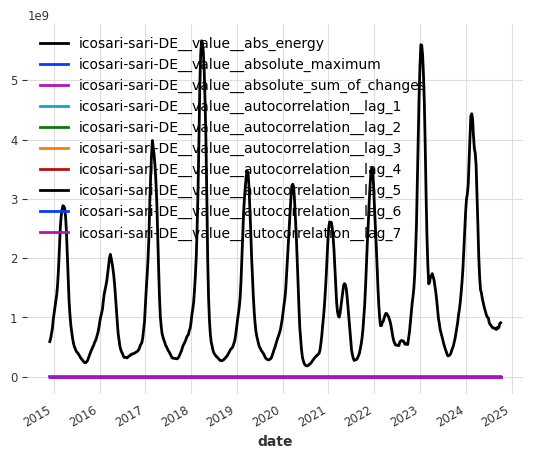

In [56]:
ts_features[[col for col in ts_features.columns if TARGETS[0] in col]].plot()

<Axes: xlabel='date'>

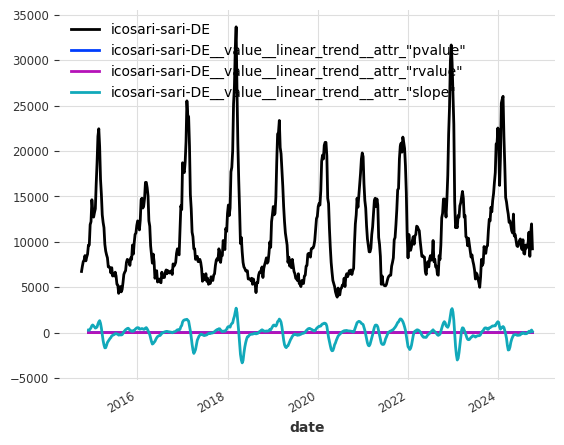

In [62]:
targets[TARGETS[0]].plot()
ts_features[[
    'icosari-sari-DE__value__linear_trend__attr_"pvalue"',
 'icosari-sari-DE__value__linear_trend__attr_"rvalue"',
 #'icosari-sari-DE__value__linear_trend__attr_"intercept"',
 'icosari-sari-DE__value__linear_trend__attr_"slope"'
]].plot()

<Axes: xlabel='date'>

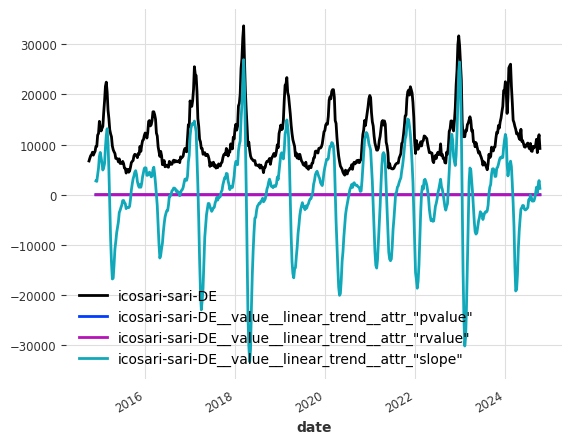

In [76]:
targets[TARGETS[0]].plot()
(ts_features[[
    'icosari-sari-DE__value__linear_trend__attr_"pvalue"',
 'icosari-sari-DE__value__linear_trend__attr_"rvalue"',
 #'icosari-sari-DE__value__linear_trend__attr_"intercept"',
 'icosari-sari-DE__value__linear_trend__attr_"slope"'
]]*10).plot()

<Axes: xlabel='date'>

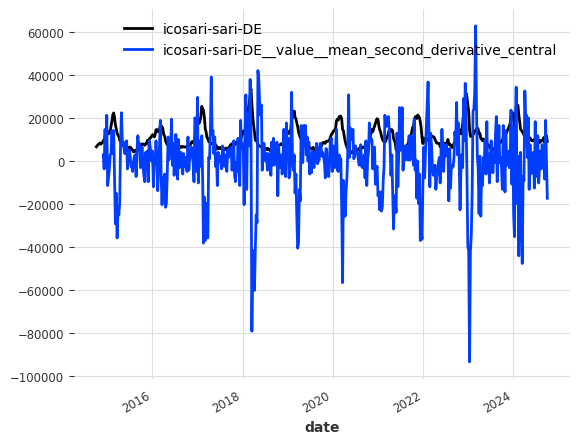

In [78]:
targets[TARGETS[0]].plot()
(ts_features[[
    'icosari-sari-DE__value__mean_second_derivative_central'
]]*100).plot()

<Axes: xlabel='date'>

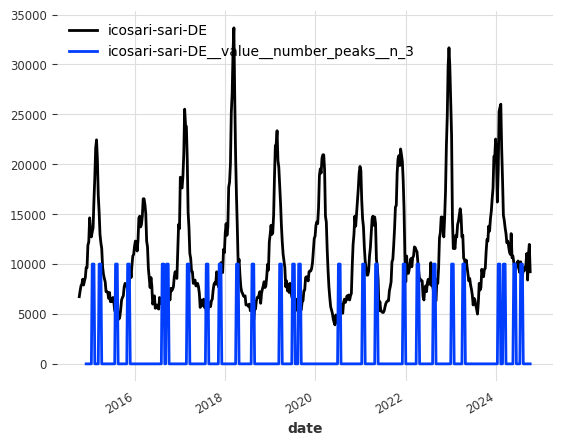

In [65]:
targets[TARGETS[0]].plot()
(ts_features[[
 #'icosari-sari-DE__value__number_peaks__n_1',
 #'icosari-sari-DE__value__number_peaks__n_2',
 'icosari-sari-DE__value__number_peaks__n_3'
]]*10000).plot()

<Axes: xlabel='date'>

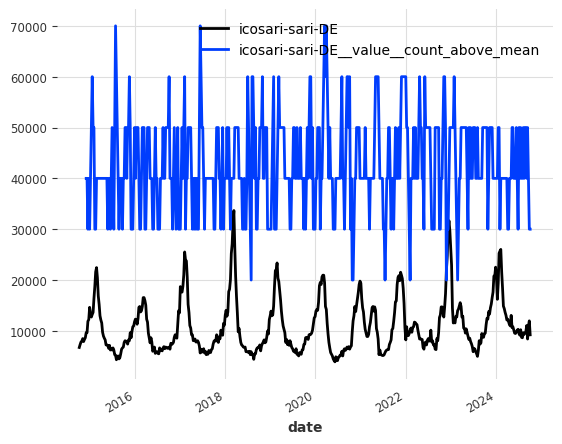

In [68]:
targets[TARGETS[0]].plot()
(ts_features[[
 'icosari-sari-DE__value__count_above_mean',
 #'icosari-sari-DE__value__count_below_mean',
]]*10000).plot()

In [3]:
[{'lag': i} for i in range(1, 9)]

[{'lag': 1},
 {'lag': 2},
 {'lag': 3},
 {'lag': 4},
 {'lag': 5},
 {'lag': 6},
 {'lag': 7},
 {'lag': 8}]

abs_energy, absolute_maximum, absolute_sum_of_changes, autocorrelation, count_above_mean, count_below_mean, 
first_location_of_maximum, first_location_of_minimum, kurtosis, last_location_of_maximum, last_location_of_minimum,
linear_trend, maximum, mean, mean_abs_change, mean_change, mean_second_derivative_central, median, minimum, number_peaks,
partial_autocorrelation, root_mean_square, skewness, standard_deviation

In [ ]:
time_series_features = {
    'abs_energy': None,
    'absolute_maximum': None,
    'absolute_sum_of_changes': None,
    'autocorrelation': [{'lag': i} for i in range(1, 9)],
    'count_above_mean': None,
    'count_below_mean': None,
    'first_location_of_maximum': None,
    'first_location_of_minimum': None,
    'kurtosis': None,
    'last_location_of_maximum': None,
    'last_location_of_minimum': None,
    'linear_trend': [{'param': [{'attr': 'pvalue'}, {'attr': 'rvalue'}, {'attr': 'intercept'}, {'attr': 'slope'}]}],
    'maximum': None,
    'mean': None,
    'mean_abs_change': None,
    'mean_change': None,
    'mean_second_derivative_central': None,
    'median': None,
    'minimum': None,
    'number_peaks': [{'n': 1}, {'n': 2}, {'n': 3}],
    'partial_autocorrelation': [{'lag': i} for i in range(1, 9)],
    'root_mean_square': None,
    'skewness': None,
    'standard_deviation': None
}

### Remove highly correlated features

In [40]:
import numpy as np

In [38]:
corr_matrix = features_filtered.iloc[:, 2:].corr().abs()

In [52]:
upper_tri = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

In [57]:
threshold = 0.9  # Set your threshold for high correlation
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

In [58]:
features_filtered.shape

(3570, 239)

In [59]:
len(to_drop)

106

In [ ]:
[f for f in features_filtered.columns if f not in to_drop]